## Relax Challenge

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing and cleaning users data

In [3]:
df_users = pd.read_csv('takehome_users.csv', encoding='latin-1')
df_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [5]:
df_users.shape

(12000, 10)

In [8]:
df_users['last_session_creation_time'] = pd.to_datetime(df_users['last_session_creation_time'], unit='s')
df_users.dtypes

object_id                              int64
creation_time                         object
name                                  object
email                                 object
creation_source                       object
last_session_creation_time    datetime64[ns]
opted_in_to_mailing_list               int64
enabled_for_marketing_drip             int64
org_id                                 int64
invited_by_user_id                   float64
dtype: object

In [10]:
unq = df_users.object_id.unique()
unq

array([    1,     2,     3, ..., 11998, 11999, 12000], dtype=int64)

In [11]:
df_users.isnull().sum().sort_values(ascending=False)

invited_by_user_id            5583
last_session_creation_time    3177
object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
dtype: int64

In [15]:
temp = df_users[df_users['last_session_creation_time'].isnull()]
temp.head(30)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaT,1,1,74,NaN
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaT,0,0,302,NaN
11,12,2014-04-17 23:48:38,Mathiesen Lærke,LaerkeLMathiesen@cuvox.de,ORG_INVITE,NaT,0,0,130,9270.0
14,15,2013-07-16 21:33:54,Theiss Ralf,RalfTheiss@hotmail.com,PERSONAL_PROJECTS,NaT,0,0,175,NaN
15,16,2013-02-11 10:09:50,Engel René,ReneEngel@hotmail.com,PERSONAL_PROJECTS,NaT,0,0,211,NaN
17,18,2013-08-24 00:26:46,Gregersen Celina,CelinaAGregersen@jourrapide.com,GUEST_INVITE,NaT,0,0,2,3153.0
25,26,2013-07-28 00:53:32,Wexler Florian,FlorianWexler@jourrapide.com,ORG_INVITE,NaT,0,0,56,11857.0
31,32,2013-04-17 16:21:30,Perez Timothy,TimothyJPerez@yahoo.com,PERSONAL_PROJECTS,NaT,1,1,98,NaN
33,34,2014-02-03 20:55:18,Holm Sara,SaraMHolm@hotmail.com,ORG_INVITE,NaT,0,0,33,3721.0
34,35,2013-08-01 10:55:26,Krueger Dieter,DieterKrueger@gustr.com,PERSONAL_PROJECTS,NaT,0,0,59,NaN


In [123]:
#df_users[df_users['last_session_creation_time']
df_users['last_session_creation_time'] = df_users['last_session_creation_time'].interpolate(method='linear')
df_users.isnull().sum().sort_values()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time       0
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

It does not appear that the entries without a time in 'last_session_creation_time' are the same as those who have only logged in once (via comparison to engagmeent dataset). These values should be imputed later on.

In [179]:
unq = df_users.invited_by_user_id.unique()
print(len(unq))

2565


In [182]:
df_gb = df_users['invited_by_user_id'].value_counts()
df_gb

invited_by_user_id
10741.0    13
2527.0     12
1525.0     11
11770.0    11
2308.0     11
           ..
1390.0      1
5445.0      1
8526.0      1
4695.0      1
5450.0      1
Name: count, Length: 2564, dtype: int64

### Importing and cleaning engagement data

In [124]:
df_eng = pd.read_csv('takehome_user_engagement.csv')
df_eng.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [125]:
df_eng.shape

(207917, 3)

In [126]:
df_eng.dtypes

time_stamp    object
user_id        int64
visited        int64
dtype: object

In [127]:
df_eng['time_stamp'] = pd.to_datetime(df_eng['time_stamp'])
df_eng.dtypes

time_stamp    datetime64[ns]
user_id                int64
visited                int64
dtype: object

In [128]:
df_eng.isnull().sum().sort_values(ascending=False)

time_stamp    0
user_id       0
visited       0
dtype: int64

In [129]:
v_unq = df_eng.visited.unique()
v_unq

array([1], dtype=int64)

In [130]:
df_eng.head(30)

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
5,2013-12-31 03:45:04,2,1
6,2014-01-08 03:45:04,2,1
7,2014-02-03 03:45:04,2,1
8,2014-02-08 03:45:04,2,1
9,2014-02-09 03:45:04,2,1


### EDA

In [131]:
cols = list(df_users.columns)
cols.remove('object_id')
cols.remove('name')
cols.remove('email')
cols

['creation_time',
 'creation_source',
 'last_session_creation_time',
 'opted_in_to_mailing_list',
 'enabled_for_marketing_drip',
 'org_id',
 'invited_by_user_id']

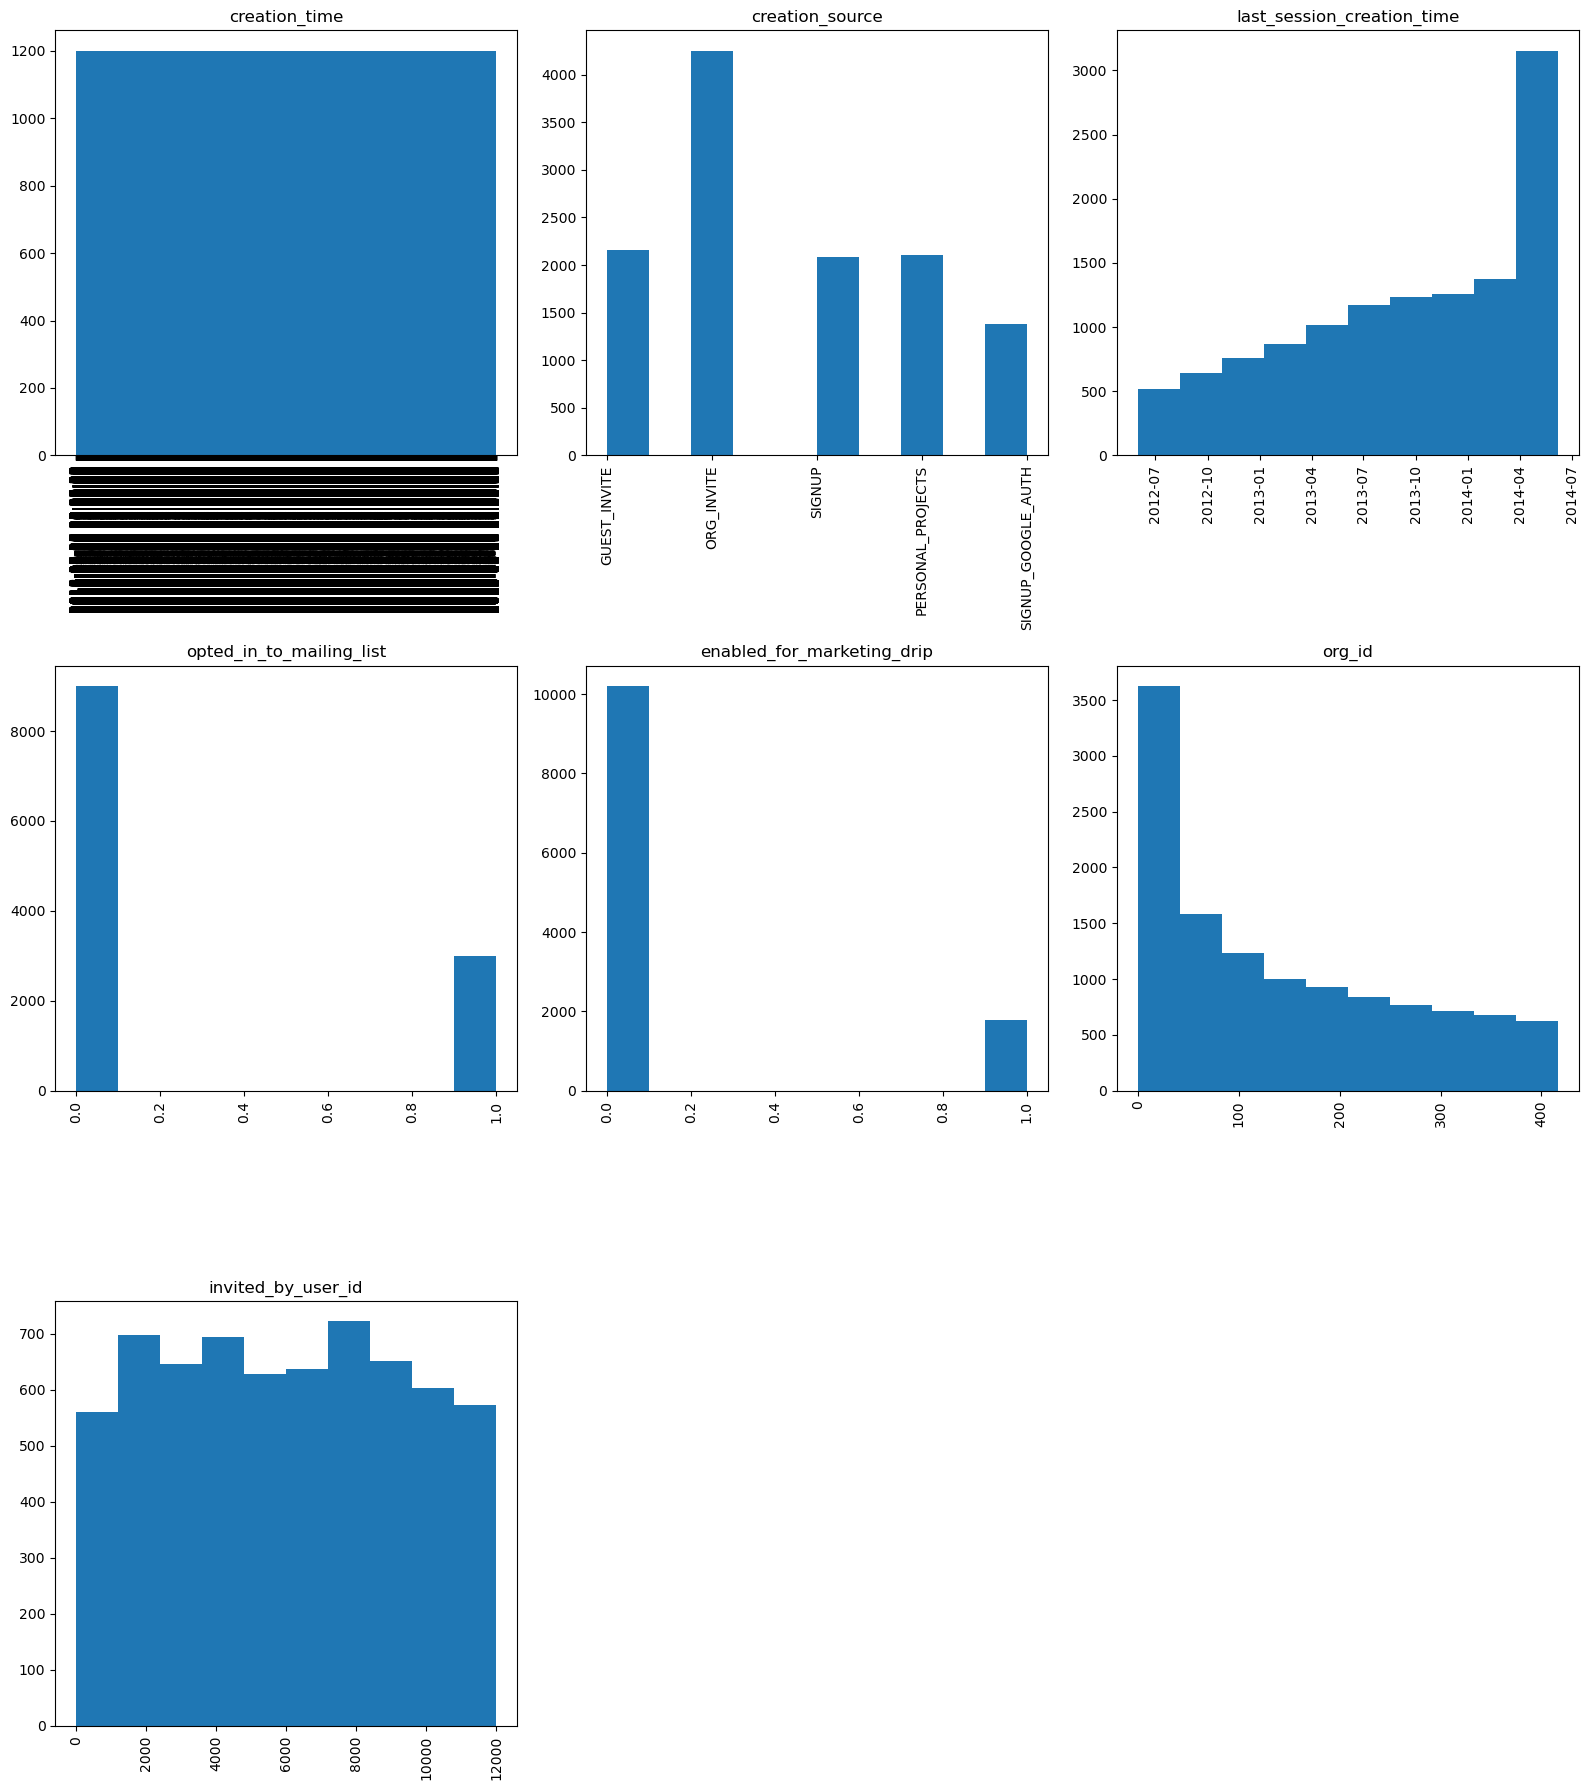

In [132]:
plt.figure(figsize=(16, 18))
for i in range(len(cols)):
    plt.subplot(3,3,i+1)
    plt.hist(df_users[cols[i]])
    plt.xticks(rotation=90)
    plt.title(cols[i])
plt.tight_layout()

In [176]:
# matrix = df_users.corr()
# sns.heatmape(matrix)

### Modeling Challenge
Defining an "adopted user" as a user who has logged into the product on three separate days in at least one seven day period, identify which factors predict future user adoption.

In [133]:
#Determine whether a user logged in on 3 days in a seven day period.
#Create a new feature called "adopted" and use True if adopted, False if not adopted.
#Combine datasets
#Use classification to build a model and determine factors for predicting adoption.

In [134]:
#Check if the user has 3 or more logins
#If not, 'adopted' is False
#If so, check the first three logins to see if they are within a 7 day period
#If they are, stop, 'adopted' is True, and go to the next person
#If not, advance one entry and check it and the 2 entries following to see if they are within a 7 day period.
#If the end of the logins is reached for that person without encountering a 3 day login in 7 days, then 'adopted' is False.

In [135]:
#options:
#1. Create a df with the id numbers of each customer, gradually add whether the customer is "adopted' or not
#2. Create an empty df and append a new row for each customer

In [136]:
df_ad = df_eng.user_id.unique()
df_ad = pd.DataFrame(df_ad, columns=['user_id'])
df_ad['adopted'] = ''
df_ad.head(10)

,user_id,adopted
0,1,
1,2,
2,3,
3,4,
4,5,
5,6,
6,7,
7,10,
8,11,
9,13,


### Testing on subset of data

In [137]:
#Subset the data for user_ids 1-10
df_10 = df_eng[df_eng['user_id']<11]
df_10

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
...,...,...,...
299,2014-05-30 22:08:03,10,1
300,2014-05-31 22:08:03,10,1
301,2014-06-01 22:08:03,10,1
302,2014-06-02 22:08:03,10,1


In [138]:
#Create new df for storing results
df_ad = df_10.user_id.unique()
df_ad = pd.DataFrame(df_ad, columns=['user_id'])
df_ad['adopted'] = ''
df_ad.head(10)

,user_id,adopted
0,1,
1,2,
2,3,
3,4,
4,5,
5,6,
6,7,
7,10,


### Test out code for just user-id == 2

In [139]:
chunk = df_eng[df_eng['user_id'] == 2]
chunk

,time_stamp,user_id,visited
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
5,2013-12-31 03:45:04,2,1
6,2014-01-08 03:45:04,2,1
7,2014-02-03 03:45:04,2,1
8,2014-02-08 03:45:04,2,1
9,2014-02-09 03:45:04,2,1
10,2014-02-13 03:45:04,2,1


In [140]:
idx = chunk.index
#below assumes indicies are sequential (do not skip)
adopted = False
for i in idx[:-2]:
    #print(i)
    week = chunk.loc[i,'time_stamp'] + pd.Timedelta(days=7)
    print(week)
    if chunk.loc[i+2, 'time_stamp'] <= week:
        adopted = True
    print(adopted)

2013-11-22 03:45:04
False
2013-12-06 03:45:04
False
2013-12-16 03:45:04
False
2014-01-01 03:45:04
False
2014-01-07 03:45:04
False
2014-01-15 03:45:04
False
2014-02-10 03:45:04
True
2014-02-15 03:45:04
True
2014-02-16 03:45:04
True
2014-02-20 03:45:04
True
2014-02-23 03:45:04
True
2014-03-16 03:45:04
True


In [141]:
idx = chunk.index
#below assumes indicies are sequential (do not skip)
adopted = False

while not adopted == True:
    for i in idx[:-2]:
        #print(i)
        week = chunk.loc[i,'time_stamp'] + pd.Timedelta(days=7)
        print(week)
        if chunk.loc[i+2, 'time_stamp'] <= week:
            adopted = True
            print(adopted)
            break

2013-11-22 03:45:04
2013-12-06 03:45:04
2013-12-16 03:45:04
2014-01-01 03:45:04
2014-01-07 03:45:04
2014-01-15 03:45:04
2014-02-10 03:45:04
True


### Test ouf for df_10

In [142]:
unq = df_10.user_id.unique()
unq

array([ 1,  2,  3,  4,  5,  6,  7, 10], dtype=int64)

In [143]:
for i in range(len(unq)):
    print(unq[i])

1
2
3
4
5
6
7
10


In [144]:
#get user ids
for i in range(len(unq)):
    adopted = False
    chunk = df_10[df_10['user_id']== unq[i]]
    print(chunk)
    if len(chunk) < 3:
        df_ad.loc[df_ad['user_id']==unq[i], 'adopted'] = adopted
    else:
        idx = chunk.index
        while not adopted == True:
            for j in idx[:-2]:
                week = chunk.loc[j,'time_stamp'] + pd.Timedelta(days=7)
                if chunk.loc[j+2, 'time_stamp'] <= week:
                    adopted = True
                    df_ad.loc[df_ad['user_id']==unq[i], 'adopted'] = adopted
                    break
    print(unq[i], adopted)

           time_stamp  user_id  visited
0 2014-04-22 03:53:30        1        1
1 False
            time_stamp  user_id  visited
1  2013-11-15 03:45:04        2        1
2  2013-11-29 03:45:04        2        1
3  2013-12-09 03:45:04        2        1
4  2013-12-25 03:45:04        2        1
5  2013-12-31 03:45:04        2        1
6  2014-01-08 03:45:04        2        1
7  2014-02-03 03:45:04        2        1
8  2014-02-08 03:45:04        2        1
9  2014-02-09 03:45:04        2        1
10 2014-02-13 03:45:04        2        1
11 2014-02-16 03:45:04        2        1
12 2014-03-09 03:45:04        2        1
13 2014-03-13 03:45:04        2        1
14 2014-03-31 03:45:04        2        1
2 True
            time_stamp  user_id  visited
15 2013-03-19 23:14:52        3        1
3 False
            time_stamp  user_id  visited
16 2013-05-22 08:09:28        4        1
4 False
            time_stamp  user_id  visited
17 2013-01-22 10:14:20        5        1
5 False
            time_sta

In [145]:
df_ad

,user_id,adopted
0,1,False
1,2,True
2,3,False
3,4,False
4,5,False
5,6,False
6,7,False
7,10,True


### Implement for entire dataset

In [262]:
#Create new df to store adopted classification
df_ad = df_eng.user_id.unique()
df_ad = pd.DataFrame(df_ad, columns=['user_id'])
df_ad['adopted'] = ''
df_ad.head(10)

,user_id,adopted
0,1,
1,2,
2,3,
3,4,
4,5,
5,6,
6,7,
7,10,
8,11,
9,13,


In [263]:
unq = df_eng.user_id.unique()
unq

array([    1,     2,     3, ..., 11998, 11999, 12000], dtype=int64)

In [266]:
import timeit
start = timeit.default_timer()
print("The start time is :", start)

#for each of the user_ids
for i in range(len(unq)):
    adopted = False
    #get just the rows for that user_id
    chunk = df_eng[df_eng['user_id']== unq[i]]
    #if there are less than 3 rows then the user does not qualify as adopted
    if len(chunk) < 3:
        df_ad.loc[df_ad['user_id']==unq[i], 'adopted'] = adopted
    #if there are more than 3 rows, then investigate if 3 in a row happen in the same week
    else:
        idx = chunk.index
        #while not adopted == True:
        for j in idx[:-2]:
            #establish one week from current row time_stamp
            week = chunk.loc[j,'time_stamp'] + pd.Timedelta(days=7)
            #if the time_stamp 2 places ahead of the current time_stamp is within the week, then the user is adopted
            if chunk.loc[j+2, 'time_stamp'] <= week:
                adopted = True
                df_ad.loc[df_ad['user_id']==unq[i], 'adopted'] = adopted
                break
    df_ad.loc[df_ad['user_id']==unq[i], 'adopted'] = adopted
    #print(unq[i], adopted)

print("The difference of time is :", 
              timeit.default_timer() - start)

The start time is : 25952.750616
The difference of time is : 13.183208799997374


In [267]:
df_ad.head()

,user_id,adopted
0,1,False
1,2,True
2,3,False
3,4,False
4,5,False


In [365]:
pct_true = np.round(df_ad.adopted.sum()/df_ad.shape[0]*100, 2)
pct_true

18.77

In [268]:
# save the data to a new csv file
df_ad.to_csv('df_ad.csv')
df_ad.to_pickle('df_ad.pkl')

### Joining the data

In [269]:
#merge dataframes, dropping any users that don't have engagment information
df = pd.merge(df_users, df_ad, left_on='object_id', right_on='user_id', how='right')

In [270]:
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,1,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,2,True
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,3,False
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,4,False
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,5,False


### Modeling

In [271]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import cross_validate, GridSearchCV, learning_curve
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import set_config

In [272]:
#Drop the columns we don't want to include
df.drop(columns=['object_id', 'user_id', 'name', 'email'], inplace=True)
df.head()

,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,2014-04-22 03:53:30,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,False
1,2013-11-15 03:45:04,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,True
2,2013-03-19 23:14:52,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,False
3,2013-05-21 08:09:28,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,False
4,2013-01-17 10:14:20,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,False


In [273]:
df.dtypes

creation_time                         object
creation_source                       object
last_session_creation_time    datetime64[ns]
opted_in_to_mailing_list               int64
enabled_for_marketing_drip             int64
org_id                                 int64
invited_by_user_id                   float64
adopted                               object
dtype: object

In [275]:
print(df.adopted.unique())

[False True]


In [277]:
X = df.drop(columns='adopted')
y = df.adopted

In [278]:
from sklearn.preprocessing import LabelEncoder
from sklearn import utils

#convert y values to categorical values
lab = LabelEncoder()
y_transformed = lab.fit_transform(y)

#view transformed values
print(y_transformed)

[0 1 0 ... 0 0 0]


In [279]:
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.2, random_state=42)

invited_by_user_id            5583
last_session_creation_time    3177
object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0

In [280]:
#numerical_cols = ['last_session_creation_time']
categorical_cols = ['creation_source', 'org_id', 'invited_by_user_id']

set_config(transform_output="pandas")

# Preprocessing for numerical data
#numerical_transformer = SimpleImputer(strategy='most_frequent')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
#        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [328]:
pipe = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [329]:
import timeit
start = timeit.default_timer()
print("The start time is :", start)
pipe.fit(X_train, y_train)
print("The difference of time is :", 
              timeit.default_timer() - start)

The start time is : 26974.4807843
The difference of time is : 24.67612949999966


In [330]:
y_pred_rf = pipe.predict(X_test)

In [331]:
conf_mat_rf = confusion_matrix(y_test, y_pred_rf)
class_rep_rf = classification_report(y_test, y_pred_rf)
acc_score_rf = accuracy_score(y_test, y_pred_rf)

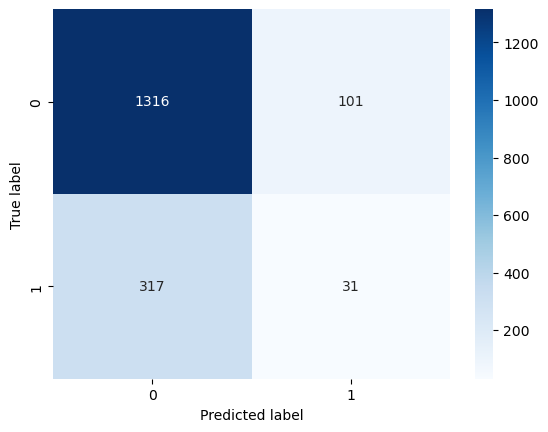

In [332]:
sns.heatmap(conf_mat_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.savefig('confmat_rf.png')

In [333]:
print(class_rep_rf)
print(acc_score_rf)

              precision    recall  f1-score   support

           0       0.81      0.93      0.86      1417
           1       0.23      0.09      0.13       348

    accuracy                           0.76      1765
   macro avg       0.52      0.51      0.50      1765
weighted avg       0.69      0.76      0.72      1765

0.7631728045325779


In [334]:
# retrieving the Classifier from the model pipeline
clf = pipe[-1]
# making a pandas dataframe
data = list(zip(clf.feature_names_in_, clf.feature_importances_))
df_importances = pd.DataFrame(data, columns=['Feature', 'Importance']).sort_values(by='Importance', ascending=False)
df_importances

,Feature,Importance
3,cat__creation_source_SIGNUP,0.021343
4,cat__creation_source_SIGNUP_GOOGLE_AUTH,0.020744
0,cat__creation_source_GUEST_INVITE,0.017222
1,cat__creation_source_ORG_INVITE,0.017131
2,cat__creation_source_PERSONAL_PROJECTS,0.011756
...,...,...
666,cat__invited_by_user_id_1488.0,0.000000
1414,cat__invited_by_user_id_5874.0,0.000000
672,cat__invited_by_user_id_1543.0,0.000000
2063,cat__invited_by_user_id_9703.0,0.000000


In [335]:
select = df_importances.reset_index()[:21]
select

,index,Feature,Importance
0,3,cat__creation_source_SIGNUP,0.021343
1,4,cat__creation_source_SIGNUP_GOOGLE_AUTH,0.020744
2,0,cat__creation_source_GUEST_INVITE,0.017222
3,1,cat__creation_source_ORG_INVITE,0.017131
4,2,cat__creation_source_PERSONAL_PROJECTS,0.011756
5,422,cat__invited_by_user_id_0,0.007879
6,5,cat__org_id_0,0.003765
7,67,cat__org_id_62,0.003506
8,240,cat__org_id_235,0.003422
9,166,cat__org_id_161,0.002886


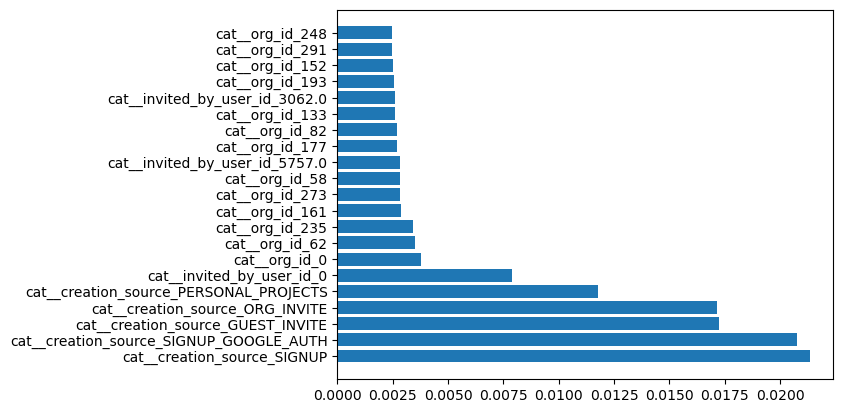

In [336]:
plt.barh(select['Feature'], select['Importance'])
plt.savefig('importances_rf.png')

### Test other models - Logistic Regression

In [337]:
pipe.set_params(model=LogisticRegression())

# Fit the pipeline again with the new classifier
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['creation_source', 'org_id',
                                                   'invited_by_user_id'])])),
                ('scaler', StandardScaler()), ('model', LogisticRegression())])

In [338]:
y_pred_lg = pipe.predict(X_test)

In [339]:
conf_mat_lg = confusion_matrix(y_test, y_pred_lg)
class_rep_lg = classification_report(y_test, y_pred_lg)
acc_score_lg = accuracy_score(y_test, y_pred_lg)

In [340]:
print(conf_mat_lg)
print(class_rep_lg)
print(acc_score_lg)

[[1309  108]
 [ 306   42]]
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1417
           1       0.28      0.12      0.17       348

    accuracy                           0.77      1765
   macro avg       0.55      0.52      0.52      1765
weighted avg       0.71      0.77      0.73      1765

0.7654390934844193


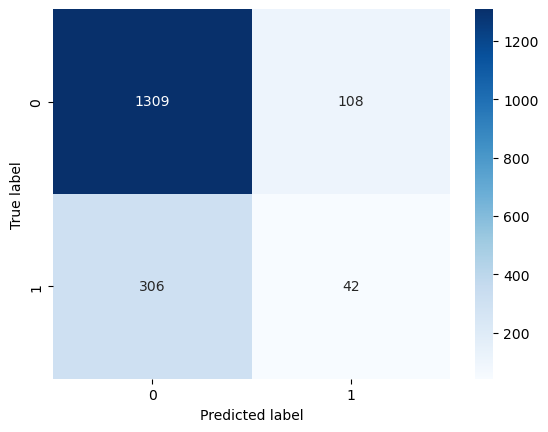

In [341]:
sns.heatmap(conf_mat_lg, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.savefig('confmat_lg.png')

In [342]:
# retrieving the Classifier from the model pipeline
clf = pipe[-1]
# making a pandas dataframe
data = list(zip(clf.feature_names_in_, clf.coef_[0]))
df_importances = pd.DataFrame(data, columns=['Feature', 'Importance']).sort_values(by='Importance', ascending=False)
df_importances

,Feature,Importance
422,cat__invited_by_user_id_0,0.387845
278,cat__org_id_273,0.263782
1830,cat__invited_by_user_id_8261.0,0.253224
1083,cat__invited_by_user_id_4019.0,0.244718
506,cat__invited_by_user_id_545.0,0.240673
...,...,...
91,cat__org_id_86,-0.228413
25,cat__org_id_20,-0.235978
93,cat__org_id_88,-0.241819
22,cat__org_id_17,-0.316792


In [343]:
df_importances['Importance'] = df_importances['Importance'].apply(lambda x: x * -1 if x < 0 else x)
df_importances.sort_values(by='Importance', ascending=False, inplace=True)
df_importances

,Feature,Importance
422,cat__invited_by_user_id_0,0.387845
1,cat__creation_source_ORG_INVITE,0.326438
22,cat__org_id_17,0.316792
278,cat__org_id_273,0.263782
1830,cat__invited_by_user_id_8261.0,0.253224
...,...,...
395,cat__org_id_390,0.003596
148,cat__org_id_143,0.002410
34,cat__org_id_29,0.002398
225,cat__org_id_220,0.002014


In [296]:
select = df_importances.reset_index()[:21]
select

,index,Feature,Importance
0,422,cat__invited_by_user_id_0,0.387845
1,1,cat__creation_source_ORG_INVITE,0.326438
2,22,cat__org_id_17,0.316792
3,278,cat__org_id_273,0.263782
4,1830,cat__invited_by_user_id_8261.0,0.253224
5,1083,cat__invited_by_user_id_4019.0,0.244718
6,93,cat__org_id_88,0.241819
7,506,cat__invited_by_user_id_545.0,0.240673
8,1689,cat__invited_by_user_id_7529.0,0.240216
9,25,cat__org_id_20,0.235978


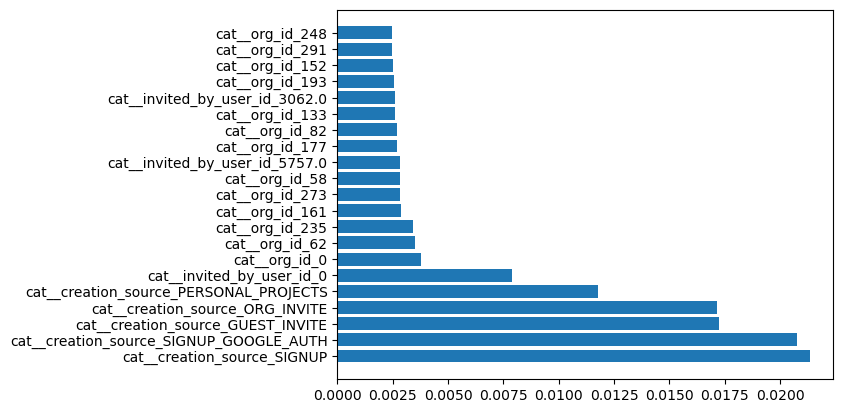

In [344]:
plt.barh(select['Feature'], select['Importance'])
plt.savefig('importances_lg.png')

### Support Vector Machines

In [345]:
pipe.set_params(model=SVC(kernel='linear', random_state=42))

# Fit the pipeline again with the new classifier
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['creation_source', 'org_id',
                                                   'invited_by_user_id'])])),
                ('scaler', StandardScaler()),
                ('model', SVC(kernel='linear', random_state=42))])

In [346]:
y_pred_sv = pipe.predict(X_test)

In [347]:
conf_mat_sv = confusion_matrix(y_test, y_pred_sv)
class_rep_sv = classification_report(y_test, y_pred_sv)
acc_score_sv = accuracy_score(y_test, y_pred_sv)

In [348]:
print(conf_mat_sv)
print(class_rep_sv)
print(acc_score_sv)

[[1325   92]
 [ 317   31]]
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1417
           1       0.25      0.09      0.13       348

    accuracy                           0.77      1765
   macro avg       0.53      0.51      0.50      1765
weighted avg       0.70      0.77      0.72      1765

0.7682719546742209


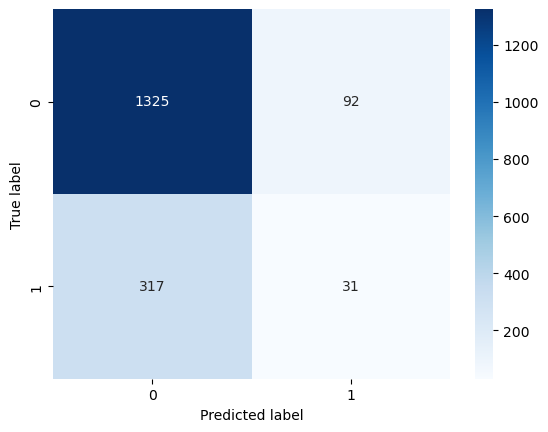

In [349]:
sns.heatmap(conf_mat_sv, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.savefig('confmat_sv.png')

In [350]:
# retrieving the Classifier from the model pipeline
clf = pipe[-1]
# making a pandas dataframe
data = list(zip(clf.feature_names_in_, clf.coef_[0]))
df_importances = pd.DataFrame(data, columns=['Feature', 'Importance']).sort_values(by='Importance', ascending=False)
df_importances

,Feature,Importance
67,cat__org_id_62,0.118900
87,cat__org_id_82,0.091601
77,cat__org_id_72,0.088709
147,cat__org_id_142,0.085694
216,cat__org_id_211,0.082586
...,...,...
1620,cat__invited_by_user_id_7120.0,-0.043380
2315,cat__invited_by_user_id_11195.0,-0.043380
688,cat__invited_by_user_id_1645.0,-0.050081
608,cat__invited_by_user_id_1149.0,-0.055988


In [351]:
df_importances['Importance'] = df_importances['Importance'].apply(lambda x: x * -1 if x < 0 else x)
df_importances.sort_values(by='Importance', ascending=False, inplace=True)
df_importances

,Feature,Importance
67,cat__org_id_62,1.188999e-01
87,cat__org_id_82,9.160118e-02
77,cat__org_id_72,8.870860e-02
147,cat__org_id_142,8.569366e-02
216,cat__org_id_211,8.258596e-02
...,...,...
1924,cat__invited_by_user_id_8850.0,1.563778e-14
933,cat__invited_by_user_id_3180.0,6.679670e-15
1019,cat__invited_by_user_id_3653.0,4.903313e-15
2108,cat__invited_by_user_id_9986.0,4.257573e-16


In [352]:
select = df_importances.reset_index()[:21]
select

,index,Feature,Importance
0,67,cat__org_id_62,0.118900
1,87,cat__org_id_82,0.091601
2,77,cat__org_id_72,0.088709
3,147,cat__org_id_142,0.085694
4,216,cat__org_id_211,0.082586
5,166,cat__org_id_161,0.079350
6,198,cat__org_id_193,0.075978
7,253,cat__org_id_248,0.075975
8,159,cat__org_id_154,0.075973
9,240,cat__org_id_235,0.072453


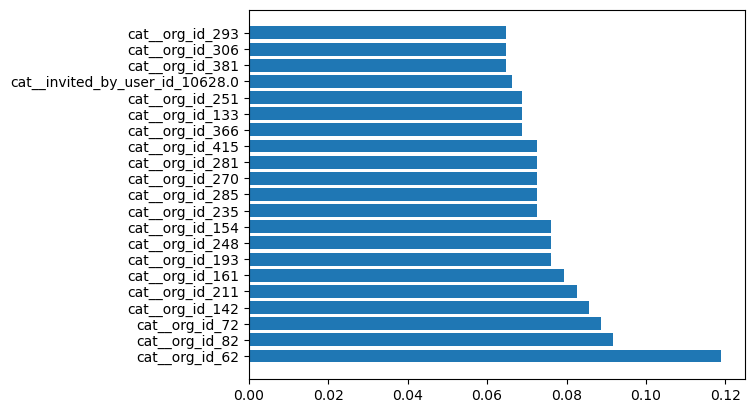

In [353]:
plt.barh(select['Feature'], select['Importance'])
plt.savefig('importances_sv.png')

### Gradient Boosting Classifier

In [354]:
pipe.set_params(model=GradientBoostingClassifier(n_estimators=100, random_state=42))

# Fit the pipeline again with the new classifier
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['creation_source', 'org_id',
                                                   'invited_by_user_id'])])),
                ('scaler', StandardScaler()),
                ('model', GradientBoostingClassifier(random_state=42))])

In [355]:
y_pred_gb = pipe.predict(X_test)

In [356]:
conf_mat_gb = confusion_matrix(y_test, y_pred_gb)
class_rep_gb = classification_report(y_test, y_pred_gb)
acc_score_gb = accuracy_score(y_test, y_pred_gb)

In [357]:
print(conf_mat_gb)
print(class_rep_gb)
print(acc_score_gb)

[[1415    2]
 [ 347    1]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1417
           1       0.33      0.00      0.01       348

    accuracy                           0.80      1765
   macro avg       0.57      0.50      0.45      1765
weighted avg       0.71      0.80      0.72      1765

0.8022662889518414


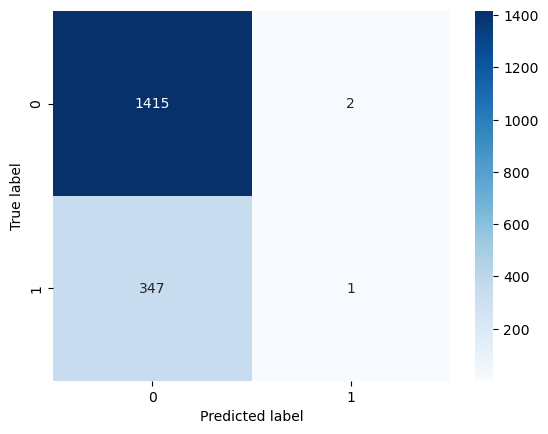

In [358]:
sns.heatmap(conf_mat_gb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.savefig('confmat_gb.png')

In [359]:
# retrieving the Classifier from the model pipeline
clf = pipe[-1]
# making a pandas dataframe
data = list(zip(clf.feature_names_in_, clf.feature_importances_))
df_importances = pd.DataFrame(data, columns=['Feature', 'Importance']).sort_values(by='Importance', ascending=False)
df_importances

,Feature,Importance
5,cat__org_id_0,0.052552
0,cat__creation_source_GUEST_INVITE,0.046710
278,cat__org_id_273,0.023317
915,cat__invited_by_user_id_3062.0,0.020281
1,cat__creation_source_ORG_INVITE,0.018641
...,...,...
828,cat__invited_by_user_id_2467.0,0.000000
830,cat__invited_by_user_id_2474.0,0.000000
831,cat__invited_by_user_id_2486.0,0.000000
832,cat__invited_by_user_id_2488.0,0.000000


In [360]:
df_importances['Importance'] = df_importances['Importance'].apply(lambda x: x * -1 if x < 0 else x)
df_importances.sort_values(by='Importance', ascending=False, inplace=True)
df_importances

,Feature,Importance
5,cat__org_id_0,0.052552
0,cat__creation_source_GUEST_INVITE,0.046710
278,cat__org_id_273,0.023317
915,cat__invited_by_user_id_3062.0,0.020281
1,cat__creation_source_ORG_INVITE,0.018641
...,...,...
2337,cat__invited_by_user_id_11337.0,0.000000
2336,cat__invited_by_user_id_11335.0,0.000000
2335,cat__invited_by_user_id_11331.0,0.000000
2334,cat__invited_by_user_id_11305.0,0.000000


In [361]:
select = df_importances.reset_index()[:21]
select

,index,Feature,Importance
0,5,cat__org_id_0,0.052552
1,0,cat__creation_source_GUEST_INVITE,0.046710
2,278,cat__org_id_273,0.023317
3,915,cat__invited_by_user_id_3062.0,0.020281
4,1,cat__creation_source_ORG_INVITE,0.018641
5,1886,cat__invited_by_user_id_8602.0,0.018220
6,182,cat__org_id_177,0.018048
7,240,cat__org_id_235,0.017869
8,7,cat__org_id_2,0.013502
9,253,cat__org_id_248,0.013275


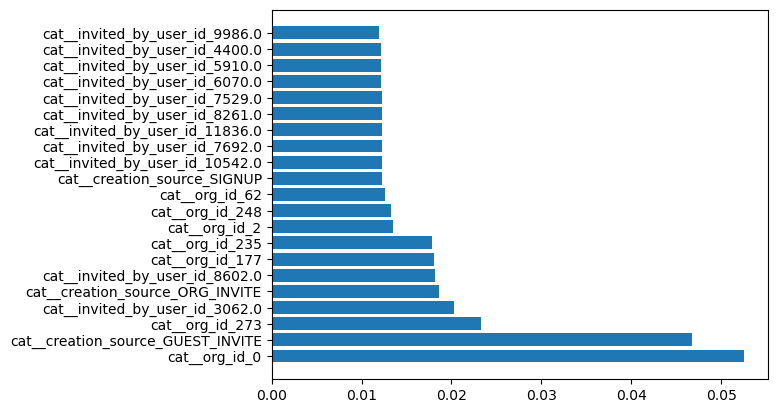

In [362]:
plt.barh(select['Feature'], select['Importance'])
plt.savefig('importances_gb.png')

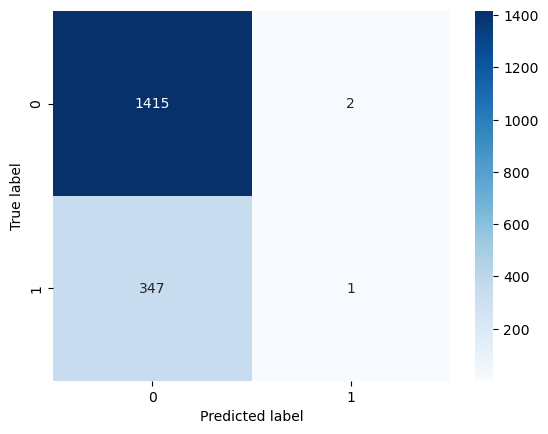

In [363]:
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.savefig('gb_confmat.png')